In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import skew, kurtosis
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns




# Import data

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
df.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
24334,Dingley Village,53 Rhoda St,4,h,NaN,SN,Biggin,14/10/2017,22.2,3172.0,...,2.0,3.0,708.0,NaN,NaN,Kingston City Council,-37.98519,145.12600,South-Eastern Metropolitan,3940.0
10493,Toorak,4/641 Malvern Rd,2,u,NaN,SP,Marshall,25/02/2017,4.6,3142.0,...,1.0,1.0,2310.0,NaN,NaN,Stonnington City Council,-37.84860,145.00830,Southern Metropolitan,7217.0
32103,Roxburgh Park,67 Lockwood Dr,4,h,600000.0,S,Ray,3/03/2018,20.6,3064.0,...,2.0,2.0,576.0,NaN,NaN,Hume City Council,-37.61475,144.92147,Northern Metropolitan,5833.0
6834,Moonee Ponds,12 Athol St,6,h,2150000.0,VB,Nelson,4/03/2017,6.9,3039.0,...,3.0,2.0,912.0,NaN,NaN,Moonee Valley City Council,-37.77000,144.91890,Western Metropolitan,6232.0
21777,Cheltenham,2/41 Harpley St,2,t,955000.0,SP,Greg,19/08/2017,17.9,3192.0,...,2.0,1.0,836.0,112.0,2009.0,Bayside City Council,-37.97342,145.07201,Southern Metropolitan,9758.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

# Question 1

In [5]:
#price column has 7610 missing values
df['Price'].isnull().sum()

7610

In [6]:
#remove rows with missing values in the 'Price' column
df = df.dropna(subset=['Price'])

In [7]:
#convert the 'Price' column to integer
df['Price'] = df['Price'].astype(int)

In [8]:
# Total number of rows and number of null rows
total_rows = 27247
null_rows = 7610

# Calculate percentage of data loss
percentage_loss = (null_rows / total_rows) * 100
percentage_loss

27.929680331779643

# Question 2

In [14]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [16]:
df['Type'].isnull().sum()

0

In [20]:
#value counts of the 'Type' column
df['Type'].value_counts()

Type
h    18472
u     5909
t     2866
Name: count, dtype: int64

In [11]:
# Define the part and whole
houses = 18472
all_properties = 27247

# Calculate the percentage
percentage = (houses / all_properties) * 100
percentage

67.79461959114765

# Question 3

In [15]:
#get the count of each type of property
properties_all = df['Type'].value_counts()

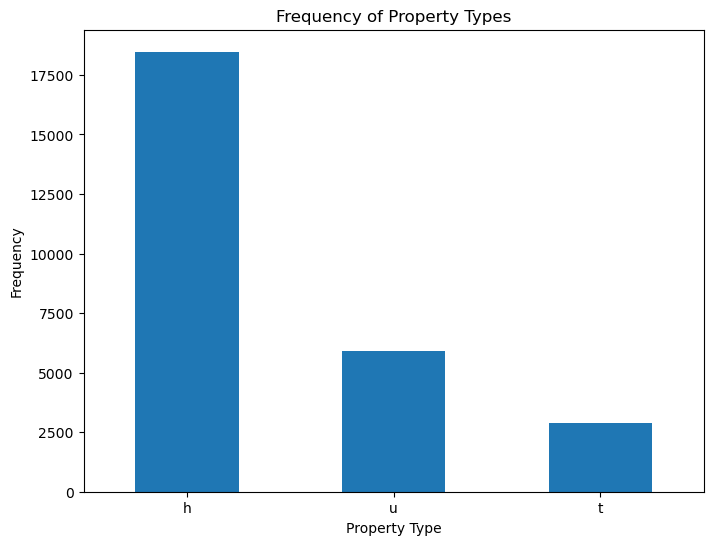

In [16]:
#create a bar chart

# Sort the property types in descending order
properties_all = properties_all.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(8, 6))
property_counts.plot(kind='bar')
plt.title('Frequency of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Question 4

In [17]:
# Group by number of rooms and calculate the median property price
median_prices = df.groupby('Rooms')['Price'].median()

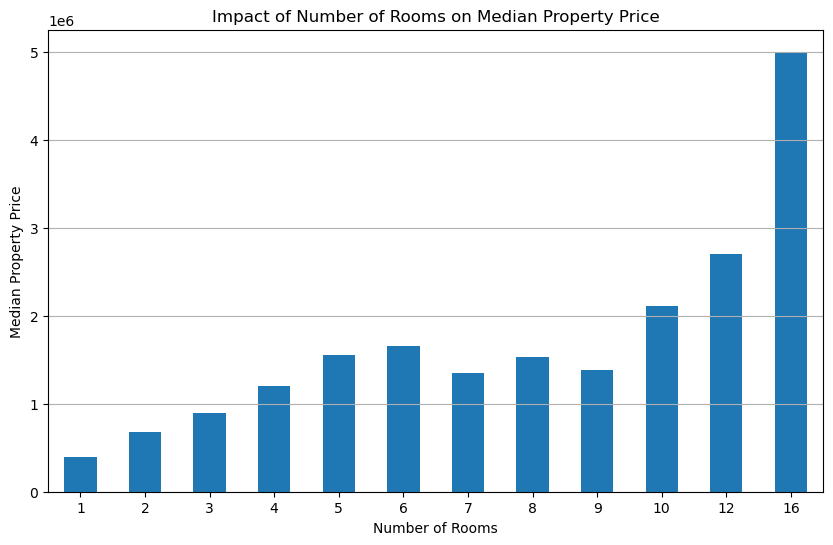

In [18]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
median_prices.plot(kind='bar')
plt.title('Impact of Number of Rooms on Median Property Price')
plt.xlabel('Number of Rooms')
plt.ylabel('Median Property Price')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Question 5

In [20]:
# Extract the columns as arrays or lists
rooms = df['Rooms']
prices = df['Price']

# Calculate the Spearman correlation coefficient
spearman_corr, p_value = spearmanr(rooms, prices)

# Display the result
print(f"Spearman Correlation Coefficient: {spearman_corr:.3f}")
print(f"P-value: {p_value:.3f}")

Spearman Correlation Coefficient: 0.504
P-value: 0.000


In [ ]:
# There is strong evidence to reject the null hypothesis that there is no association between the number of rooms and the property price.
# 0.504 shows that as room count increases, the price tends to increase as well, but not in a perfectly linear way.

# Question 6

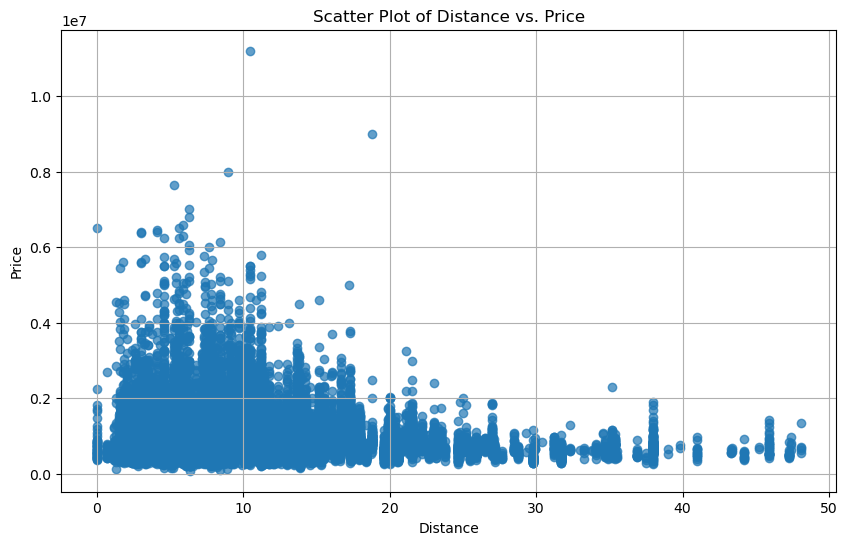

In [23]:
# Distance - from property to CBD
distance = df['Distance']
price = df['Price']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(distance, price, alpha=0.7)
plt.title('Scatter Plot of Distance vs. Price')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [24]:
# Calculate Pearson correlation coefficient
pearson_corr = df['Distance'].corr(df['Price'], method='pearson')

print(f"Pearson Correlation Coefficient: {pearson_corr:.3f}")

Pearson Correlation Coefficient: -0.211


In [ ]:
#The value -0.211 suggests a weak linear relationship between the two variables.
#The negative sign indicates an inverse or negative relationship. As the distance increases, the price tends to decrease.

# Question 7

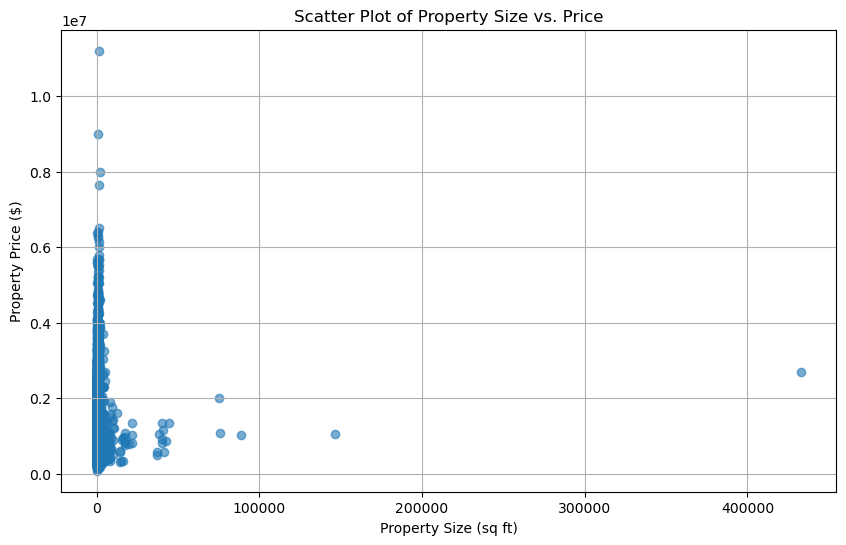

In [26]:
size = df['Landsize']
price = df['Price']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(size, price, alpha=0.6)
plt.title('Scatter Plot of Property Size vs. Price')
plt.xlabel('Property Size (sq ft)')
plt.ylabel('Property Price ($)')
plt.grid(True)
plt.show()


In [27]:
correlation = df['Landsize'].corr(df['Price'])
print(f'Pearson correlation coefficient: {correlation:.3f}')

Pearson correlation coefficient: 0.033


In [28]:
#The coefficient value 0.033 is very close to zero, indicating that there is almost no linear relationship between the two variables.

# Question 8

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


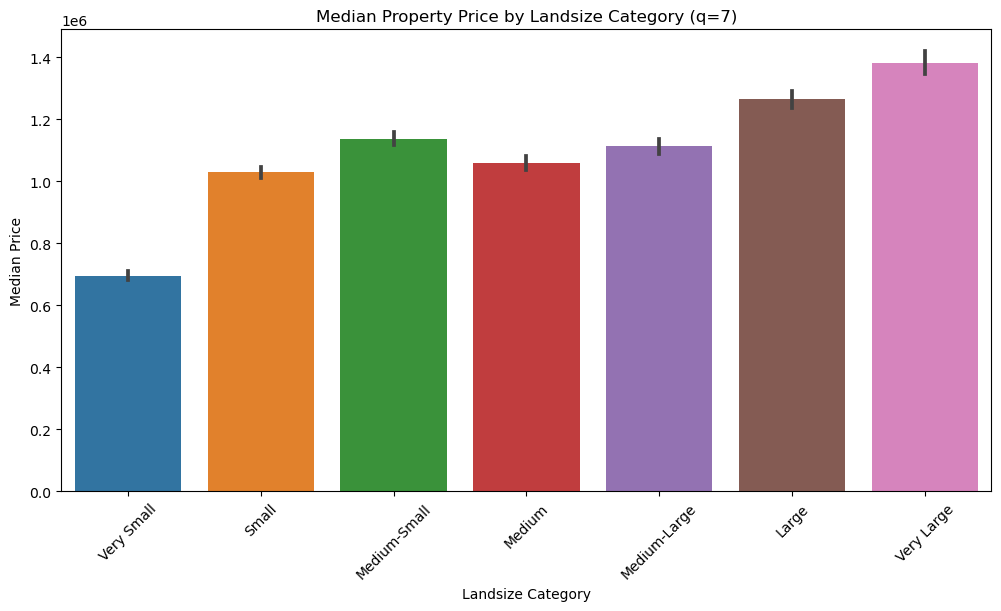

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


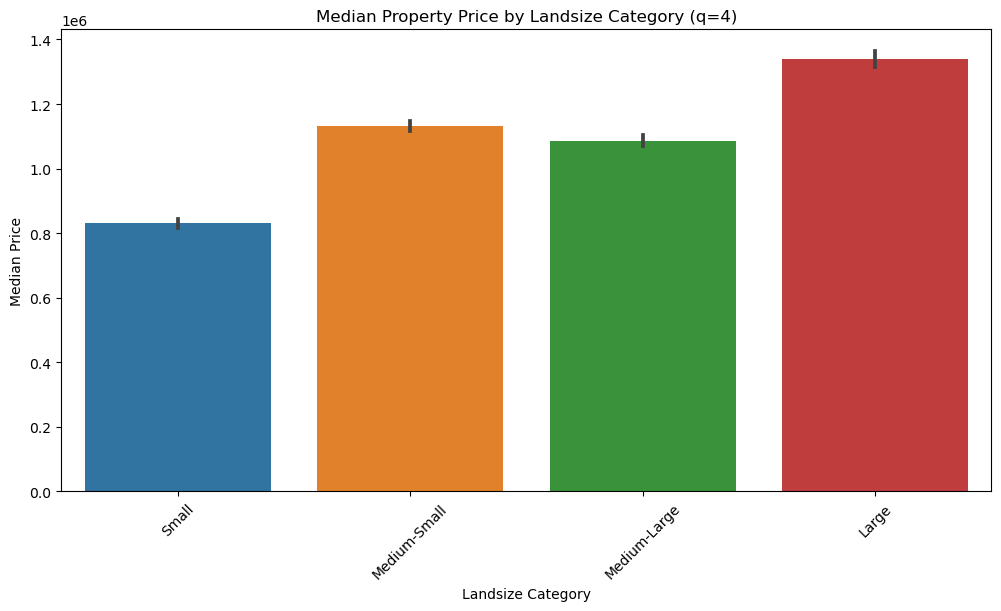

In [66]:
# Barplot with quantile-based discretization (q=7)
df['Landsize_cat'] = pd.qcut(df['Landsize'], q=7, labels=['Very Small', 'Small', 'Medium-Small', 'Medium', 'Medium-Large', 'Large', 'Very Large'])
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Landsize_cat', y='Price')
plt.title('Median Property Price by Landsize Category (q=7)')
plt.xlabel('Landsize Category')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.show()
# Comparison with lower quantile value (q=4)
df['Landsize_cat_low'] = pd.qcut(df['Landsize'], q=4, labels=['Small', 'Medium-Small', 'Medium-Large', 'Large'])
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Landsize_cat_low', y='Price')
plt.title('Median Property Price by Landsize Category (q=4)')
plt.xlabel('Landsize Category')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.show()

# Question 9 

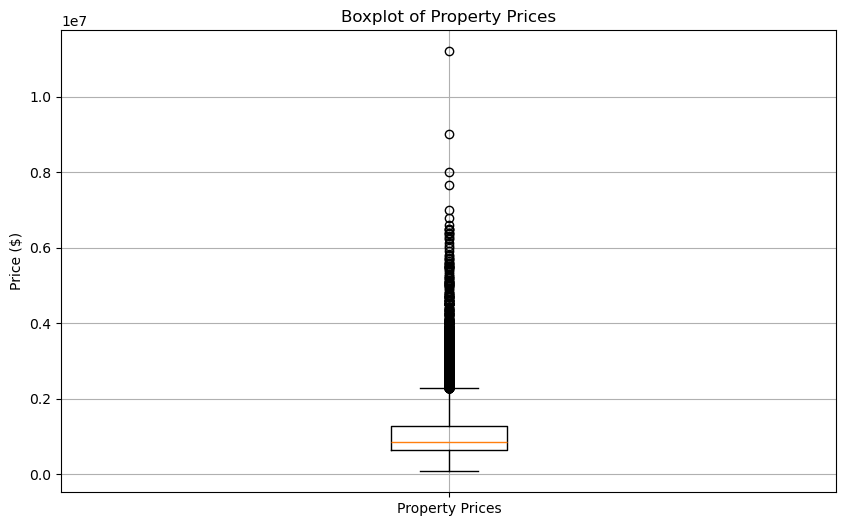

In [29]:
# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df['Price'])
plt.title('Boxplot of Property Prices')
plt.ylabel('Price ($)')
plt.xticks([1], ['Property Prices'])  # Customize x-ticks if necessary
plt.grid(True)
plt.show()

In [31]:

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

# Compute the IQR
IQR = Q3 - Q1

# Define the outlier step (1.5 times the IQR)
step = 1.5 * IQR

# Define lower and upper bounds
lower_bound = Q1 - step
upper_bound = Q3 + step

# Create a new DataFrame without outliers
filtered_df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

In [ ]:
filtered_df.info()

In [37]:
total_with_outliers = 27247
total_without_outliers = 25969
number_of_outliers = total_with_outliers - total_without_outliers


percentage_of_outliers = (number_of_outliers / total_with_outliers) * 100
percentage_of_outliers

4.690424633904651

# Question 10 

<Figure size 600x600 with 0 Axes>

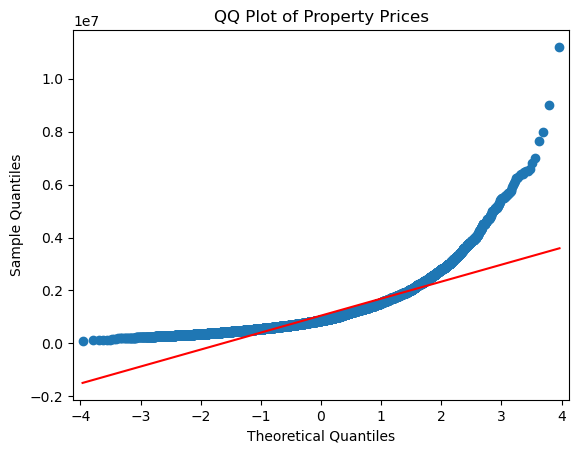

In [39]:
# Create a QQ plot
plt.figure(figsize=(6, 6))
qqplot(df['Price'], line='s')
plt.title('QQ Plot of Property Prices')
plt.show()

In [40]:
# Calculate skewness and kurtosis
data_skew = skew(df['Price'])
data_kurtosis = kurtosis(df['Price'])

# Display skewness and kurtosis
print(f"Skewness: {data_skew}")
print(f"Kurtosis: {data_kurtosis}")

Skewness: 2.588826811108291
Kurtosis: 13.094577018742875


In [ ]:
#strong positive skewness indicates that the data is skewed to the right, with a long tail on the right side of the distribution.
# this data is leptokurtic. This means that the data has heavy tails and a sharp peak around the mean.
#This is indicative of more frequent extreme values (outliers) than you would expect in a normal distribution.

# Question 11

In [42]:
# Normalize the data by subtracting the mean and dividing by the standard deviation
prices_normalized = (df['Price'] - df['Price'].mean()) / df['Price'].std()

# Perform the Kolmogorov-Smirnov test against a normal distribution
ks_statistic, p_value = stats.kstest(prices_normalized, 'norm')

# Print the results
print(f"K-S Statistic: {ks_statistic}")
print(f"P-Value: {p_value}")

K-S Statistic: 0.13751284953784154
P-Value: 0.0


In [ ]:
#K-S statistic of 0.1375 indicates that there is a noticeable distance between the price distribution and the normal distribution. 

# Question 12

<Figure size 1000x600 with 0 Axes>

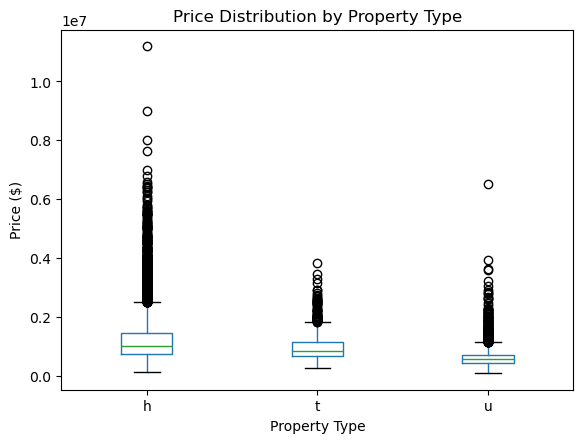

In [44]:
# Create a box plot for price distribution by property type
plt.figure(figsize=(10, 6))
df.boxplot(column='Price', by='Type', grid=False)
plt.title('Price Distribution by Property Type')
plt.suptitle('')  # Removes the default title to set your own
plt.xlabel('Property Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=0)
plt.show()

# Question 13

In [49]:
# Group by region and calculate the median price
median_prices_by_region = df.groupby('Regionname')['Price'].median()

# Find the region with the highest median price
region_with_highest_median = median_prices_by_region.idxmax()
region_with_highest_median


'Southern Metropolitan'

In [50]:
# Find the region with the lowest median price
region_with_lowest_median = median_prices_by_region.idxmin()
region_with_lowest_median

'Western Victoria'

# Question 14

In [54]:
#split price in categories
# Define the number of bins
num_bins = 5

# Use pd.cut to bin the data into 5 categories
df['price_category'] = pd.cut(
    df['Price'],
    bins=num_bins,  # Divide into 5 equal-width bins
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'],  # Label each bin
    include_lowest=True  # Include the lowest value in the first bin
)

# Display the DataFrame with the new categorical variable
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,price_category
1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,Very Low
2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,Very Low
4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,Very Low
5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0,Very Low
6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0,Very Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000,PI,Jas,24/02/2018,6.3,3013.0,...,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,Very Low
34853,Yarraville,29A Murray St,2,h,888000,SP,Sweeney,24/02/2018,6.3,3013.0,...,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,Very Low
34854,Yarraville,147A Severn St,2,t,705000,S,Jas,24/02/2018,6.3,3013.0,...,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,Very Low
34855,Yarraville,12/37 Stephen St,3,h,1140000,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,Very Low


In [58]:
# Create a contingency table
contingency_table = pd.crosstab(df['price_category'], df['Regionname'])

# Perform the Chi-square test of independence
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Print results
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi-square Statistic: 1564.734998801968
P-value: 0.0


In [62]:
# Calculate Cramér's V
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(chi2_stat / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.11982707737545066


# Question 15

In [70]:
# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [75]:
# Extract the year from the date
df['Year'] = df['Date'].dt.year

# Calculate the median price for each year
median_prices_by_year = df.groupby('Year')['Price'].median()
median_prices_by_year

Year
2016.0    900000.0
2017.0    845000.0
2018.0    800000.0
Name: Price, dtype: float64

In [77]:
# Find the earliest year
earliest_year = median_prices_by_year.index.min()
earliest_year

2016.0

In [78]:
# Find the latest year
latest_year = median_prices_by_year.index.max()
latest_year

2018.0

In [80]:
# Calculate the median prices for the earliest and latest years
earliest_median_price = median_prices_by_year[earliest_year]
earliest_median_price

900000.0

In [81]:
latest_median_price = median_prices_by_year[latest_year]
latest_median_price

800000.0

In [83]:
# Calculate the percentage change in median price
percentage_change = ((latest_median_price - earliest_median_price) / earliest_median_price) * 100
percentage_change

-11.11111111111111

# Question 16

In [86]:
# Extract the month from the date
df['Month'] = df['Date'].dt.month

# Count the number of sales per month
sales_by_month = df['Month'].value_counts().sort_index()

# Find the month with the most sales
most_sales_month = sales_by_month.idxmax()
most_sales_count = sales_by_month.max()

# Create a mapping from month number to month name
month_name_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 
                  6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 
                  11: 'November', 12: 'December'}

# Get the name of the month with the most sales
most_sales_month_name = month_name_map[most_sales_month]
most_sales_month_name

'March'